# Лабораторная работа №1

## 1) Текстовое описание набора данных
В качестве набора данных мы будем использовать набор данных Diabets dataset https://scikit-learn.org/stable/datasets/index.html#toy-datasets
Для каждого из n = 442 больных сахарным диабетом были получены десять исходных переменных, возраст, пол, индекс массы тела, среднее артериальное давление и шесть измерений сыворотки крови, а также интересующая нас реакция - количественная мера прогрессирования заболевания через год после исходного уровня.

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

data = pd.read_csv('data/diabetes.tab.txt', sep="\t")

# 2) Основные характеристики датасета

In [9]:
# Первые 5 строк датасета
data.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135


In [10]:
# Размер датасета - 442 строки, 11 колонок
data.shape

(442, 11)

In [11]:
total_count = data.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 442


In [12]:
# Список колонок
data.columns

Index(['AGE', 'SEX', 'BMI', 'BP', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'Y'], dtype='object')

In [13]:
# Список колонок с типами данных
data.dtypes

AGE      int64
SEX      int64
BMI    float64
BP     float64
S1       int64
S2     float64
S3     float64
S4     float64
S5     float64
S6       int64
Y        int64
dtype: object

In [14]:
# Проверим наличие пустых значений
# Цикл по колонкам датасета
for col in data.columns:
    # Количество пустых значений - все значения заполнены
    temp_null_count = data[data[col].isnull()].shape[0]
    print('{} - {}'.format(col, temp_null_count))

AGE - 0
SEX - 0
BMI - 0
BP - 0
S1 - 0
S2 - 0
S3 - 0
S4 - 0
S5 - 0
S6 - 0
Y - 0


In [15]:
# Основные статистические характеристки набора данных
data.describe()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
count,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000
mean,48.518100,1.468326,26.375792,94.647014,189.140271,115.439140,49.788462,4.070249,4.641411,91.260181,152.133484
std,13.109028,0.499561,4.418122,13.831283,34.608052,30.413081,12.934202,1.290450,0.522391,11.496335,77.093005
min,19.000000,1.000000,18.000000,62.000000,97.000000,41.600000,22.000000,2.000000,3.258100,58.000000,25.000000
25%,38.250000,1.000000,23.200000,84.000000,164.250000,96.050000,40.250000,3.000000,4.276700,83.250000,87.000000
50%,50.000000,1.000000,25.700000,93.000000,186.000000,113.000000,48.000000,4.000000,4.620050,91.000000,140.500000
75%,59.000000,2.000000,29.275000,105.000000,209.750000,134.500000,57.750000,5.000000,4.997200,98.000000,211.500000
max,79.000000,2.000000,42.200000,133.000000,301.000000,242.400000,99.000000,9.090000,6.107000,124.000000,346.000000


In [21]:
# Определим уникальные значения для целевого признака
data['SEX'].unique()

array([2, 1], dtype=int64)

# 3) Визуальное исследование датасета

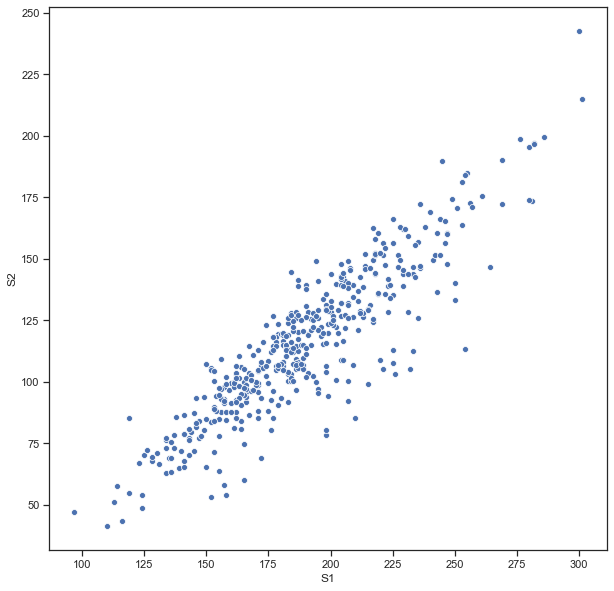

In [38]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='S1', y='S2', data=data)

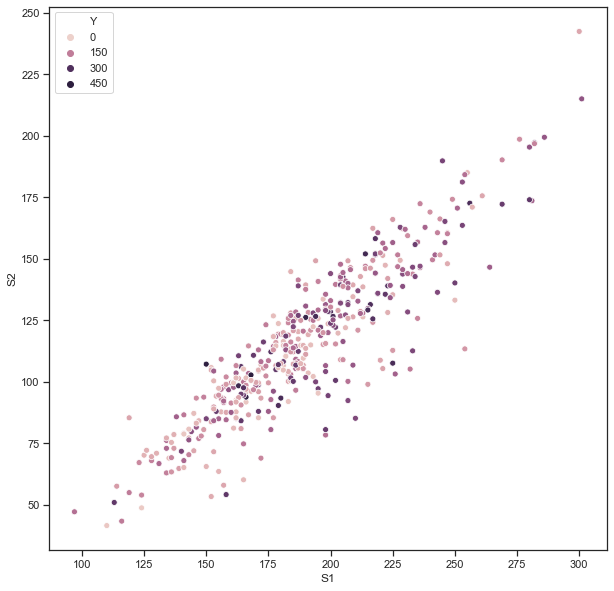

In [42]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='S1', y='S2', data=data, hue='Y')

## Гистограмма

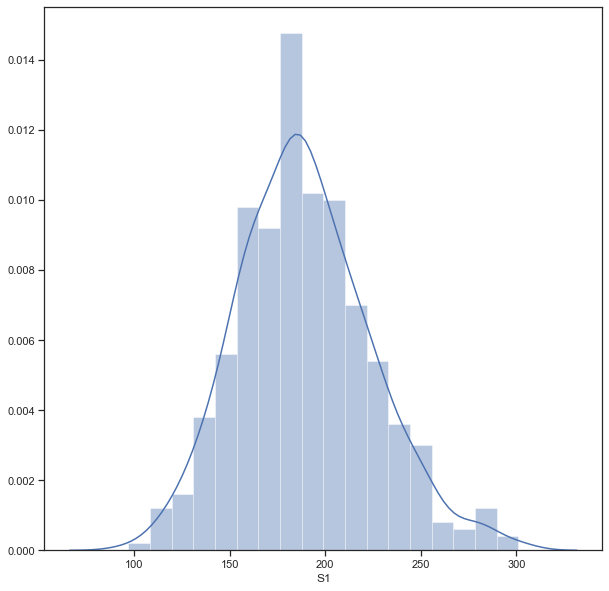

In [43]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.distplot(data['S1'])

### Jointplot
Комбинация гистограмм и диаграмм рассеивания.

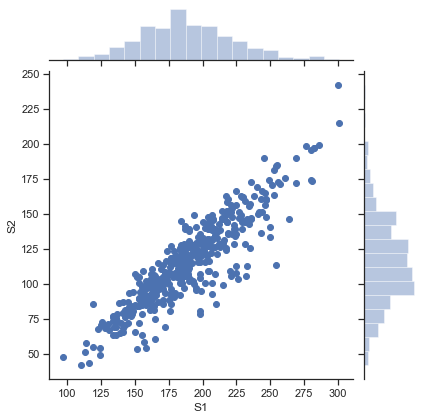

In [44]:
sns.jointplot(x='S1', y='S2', data=data)

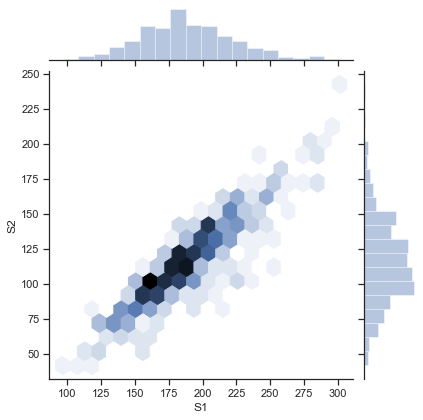

In [48]:
sns.jointplot(x='S1', y='S2', data=data, kind="hex")

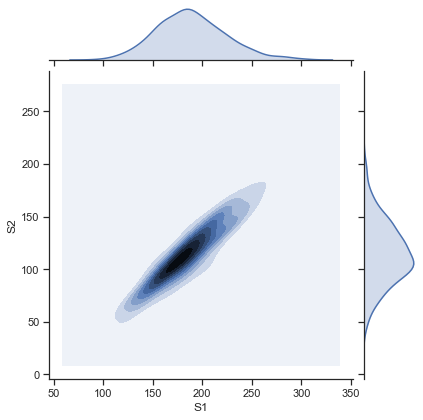

In [49]:
sns.jointplot(x='S1', y='S2', data=data, kind="kde")

## "Парные диаграммы"

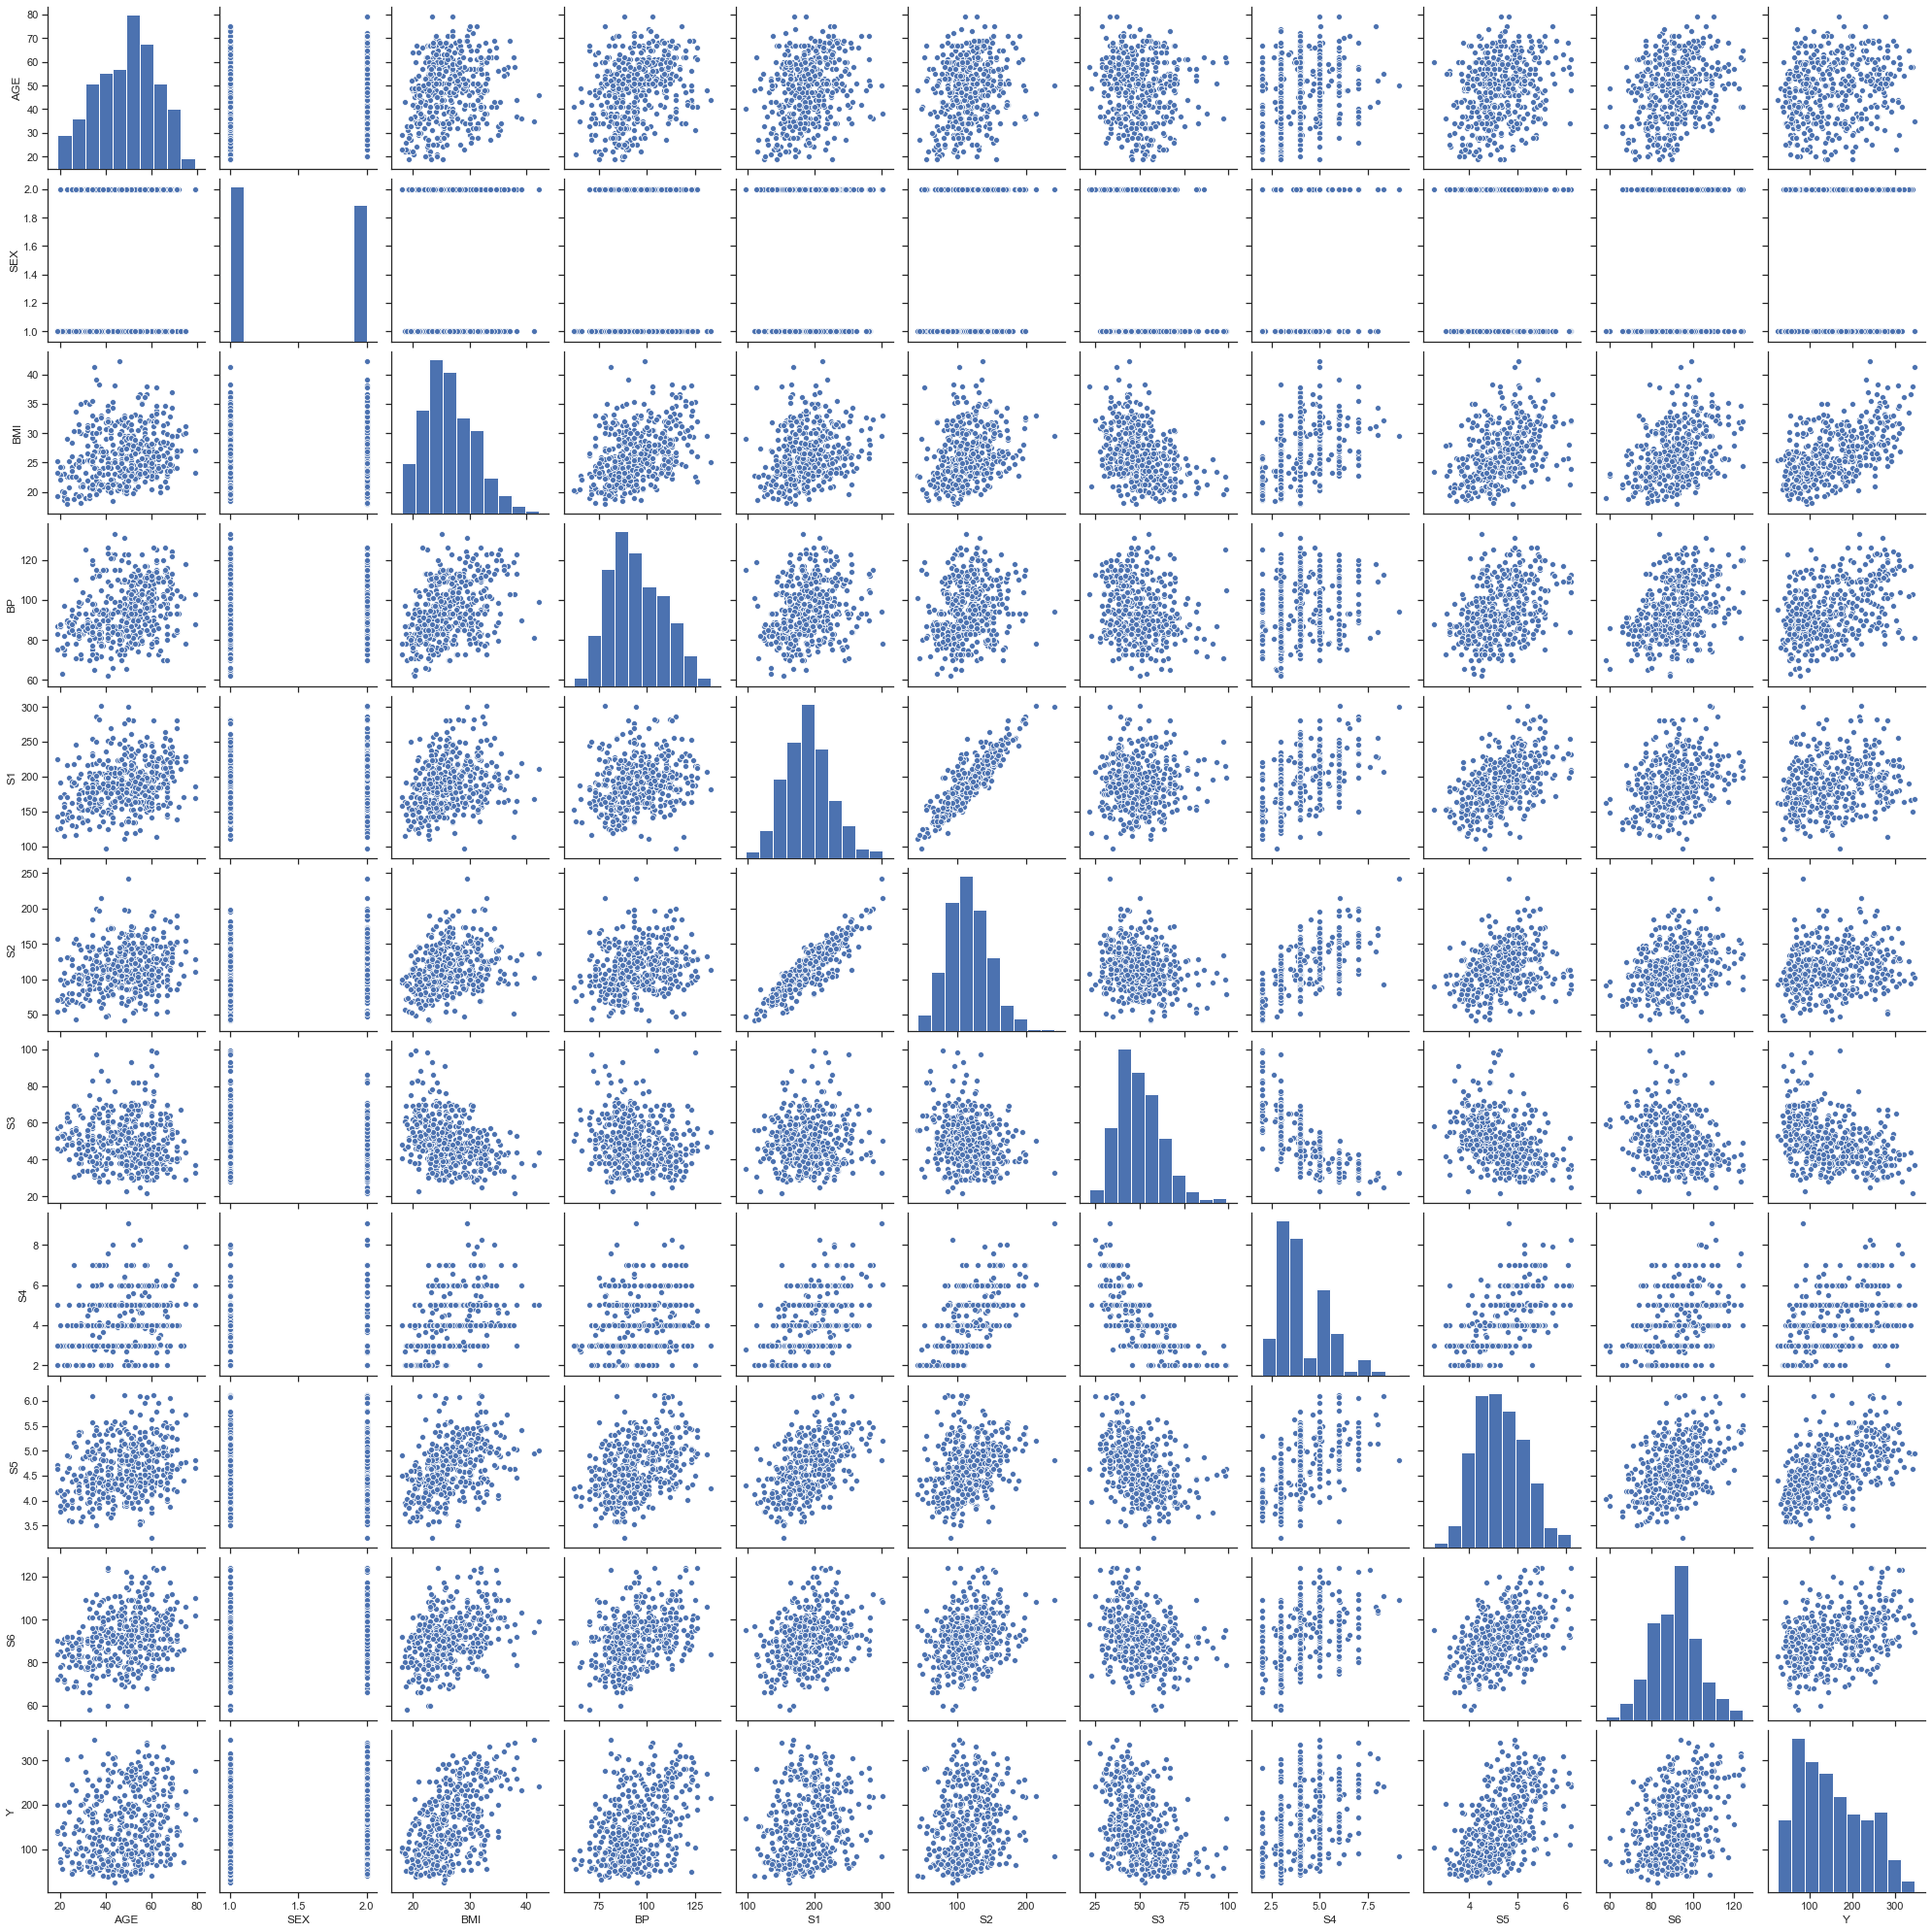

In [54]:
sns.pairplot(data)

### Ящик с усами
Отображает одномерное распределение вероятности.

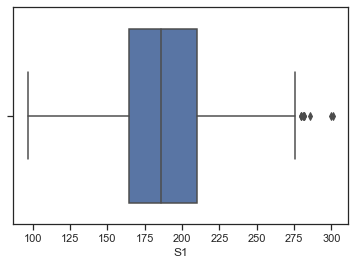

In [56]:
sns.boxplot(x=data['S1'])

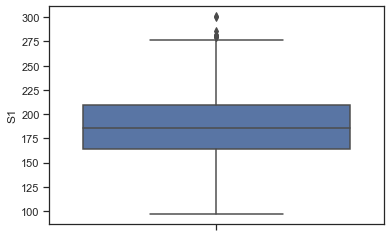

In [57]:
# По вертикали
sns.boxplot(y=data['S1'])

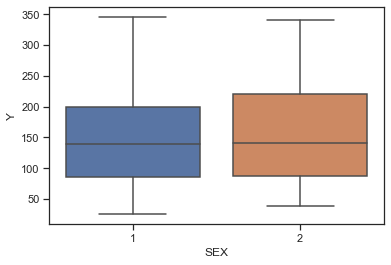

In [61]:
# Распределение параметра S1 сгруппированные по Y.
sns.boxplot(x='SEX', y='Y', data=data)

### Violin plot
Похоже на предыдущую диаграмму, но по краям отображаются распределения плотности

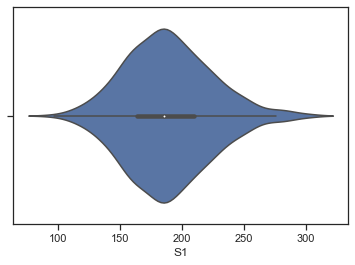

In [59]:
sns.violinplot(x=data['S1'])

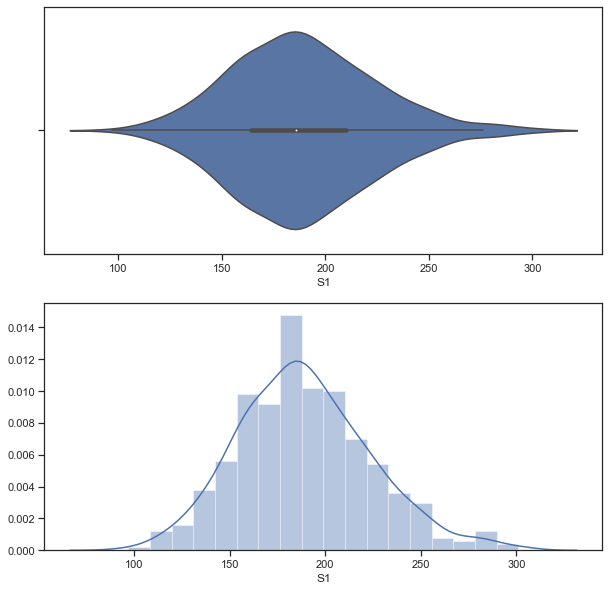

In [62]:
fig, ax = plt.subplots(2, 1, figsize=(10,10))
sns.violinplot(ax=ax[0], x=data['S1'])
sns.distplot(data['S1'], ax=ax[1])

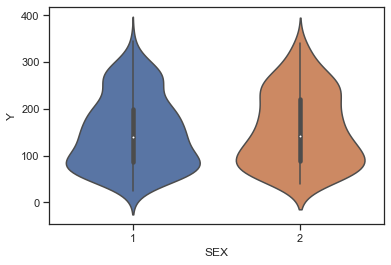

In [65]:
# Распределение параметра Humidity сгруппированные по Occupancy.
sns.violinplot(x='SEX', y='Y', data=data)

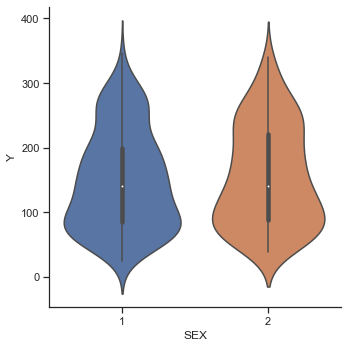

In [79]:
sns.catplot(y='Y', x='SEX', data=data, kind="violin", split=True)

# 4) Информация о корреляции признаков

In [68]:
data.corr()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
AGE,1.000000,0.173737,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731,0.187889
SEX,0.173737,1.000000,0.088161,0.241010,0.035277,0.142637,-0.379090,0.332115,0.149916,0.208133,0.043062
BMI,0.185085,0.088161,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680,0.586450
BP,0.335428,0.241010,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430,0.441482
S1,0.260061,0.035277,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717,0.212022
S2,0.219243,0.142637,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600,0.174054
S3,-0.075181,-0.379090,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
S4,0.203841,0.332115,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212,0.430453
S5,0.270774,0.149916,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669,0.565883
S6,0.301731,0.208133,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000,0.382483


In [69]:
data.corr(method='pearson')

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
AGE,1.000000,0.173737,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731,0.187889
SEX,0.173737,1.000000,0.088161,0.241010,0.035277,0.142637,-0.379090,0.332115,0.149916,0.208133,0.043062
BMI,0.185085,0.088161,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680,0.586450
BP,0.335428,0.241010,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430,0.441482
S1,0.260061,0.035277,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717,0.212022
S2,0.219243,0.142637,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600,0.174054
S3,-0.075181,-0.379090,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
S4,0.203841,0.332115,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212,0.430453
S5,0.270774,0.149916,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669,0.565883
S6,0.301731,0.208133,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000,0.382483


In [70]:
data.corr(method='kendall')

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
AGE,1.000000,0.146580,0.136535,0.242111,0.182220,0.153612,-0.073846,0.160898,0.180544,0.201784,0.130709
SEX,0.146580,1.000000,0.080424,0.215733,0.022809,0.110208,-0.326188,0.297335,0.143172,0.168199,0.030630
BMI,0.136535,0.080424,1.000000,0.281770,0.194171,0.198583,-0.249831,0.335625,0.344720,0.266373,0.391195
BP,0.242111,0.215733,0.281770,1.000000,0.188067,0.140253,-0.131014,0.205948,0.268863,0.264566,0.289352
S1,0.182220,0.022809,0.194171,0.188067,1.000000,0.717229,0.010695,0.393367,0.356268,0.227139,0.154016
S2,0.153612,0.110208,0.198583,0.140253,0.717229,1.000000,-0.133332,0.503579,0.242250,0.194082,0.129665
S3,-0.073846,-0.326188,-0.249831,-0.131014,0.010695,-0.133332,1.000000,-0.638633,-0.311775,-0.200545,-0.278884
S4,0.160898,0.297335,0.335625,0.205948,0.393367,0.503579,-0.638633,1.000000,0.485410,0.307397,0.324734
S5,0.180544,0.143172,0.344720,0.268863,0.356268,0.242250,-0.311775,0.485410,1.000000,0.316235,0.408988
S6,0.201784,0.168199,0.266373,0.264566,0.227139,0.194082,-0.200545,0.307397,0.316235,1.000000,0.239051


In [71]:
data.corr(method='spearman')

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
AGE,1.000000,0.177463,0.200554,0.350859,0.262524,0.221711,-0.106973,0.221017,0.265176,0.296235,0.197822
SEX,0.177463,1.000000,0.098079,0.261508,0.027790,0.134695,-0.394584,0.337524,0.174625,0.203277,0.037401
BMI,0.200554,0.098079,1.000000,0.397985,0.287829,0.295494,-0.371172,0.459068,0.491609,0.384664,0.561382
BP,0.350859,0.261508,0.397985,1.000000,0.275224,0.205638,-0.191033,0.280799,0.396071,0.381219,0.416241
S1,0.262524,0.027790,0.287829,0.275224,1.000000,0.878793,0.015308,0.520674,0.512864,0.332173,0.232429
S2,0.221711,0.134695,0.295494,0.205638,0.878793,1.000000,-0.197435,0.652283,0.349947,0.286483,0.195834
S3,-0.106973,-0.394584,-0.371172,-0.191033,0.015308,-0.197435,1.000000,-0.789694,-0.450420,-0.290863,-0.410022
S4,0.221017,0.337524,0.459068,0.280799,0.520674,0.652283,-0.789694,1.000000,0.640390,0.413700,0.448931
S5,0.265176,0.174625,0.491609,0.396071,0.512864,0.349947,-0.450420,0.640390,1.000000,0.453023,0.589416
S6,0.296235,0.203277,0.384664,0.381219,0.332173,0.286483,-0.290863,0.413700,0.453023,1.000000,0.350792


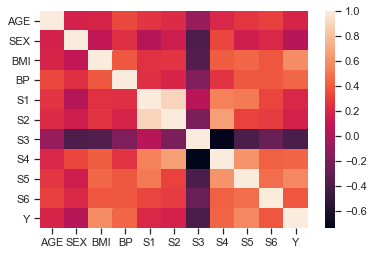

In [72]:
sns.heatmap(data.corr())

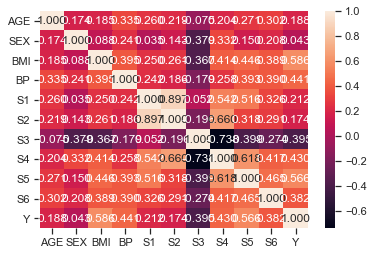

In [74]:
# Вывод значений в ячейках
sns.heatmap(data.corr(), annot=True, fmt='.3f')

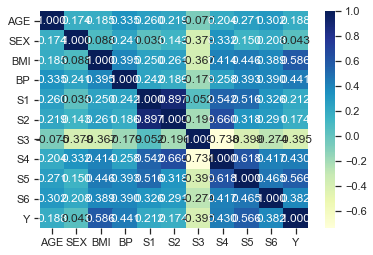

In [75]:
# Изменение цветовой гаммы
sns.heatmap(data.corr(), cmap='YlGnBu', annot=True, fmt='.3f')

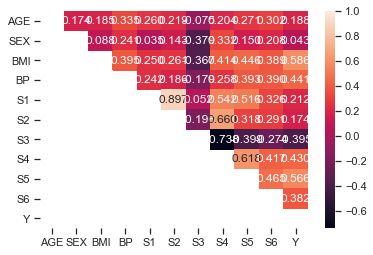

In [76]:
# Треугольный вариант матрицы
mask = np.zeros_like(data.corr(), dtype=np.bool)
# чтобы оставить нижнюю часть матрицы
# mask[np.triu_indices_from(mask)] = True
# чтобы оставить верхнюю часть матрицы
mask[np.tril_indices_from(mask)] = True
sns.heatmap(data.corr(), mask=mask, annot=True, fmt='.3f')

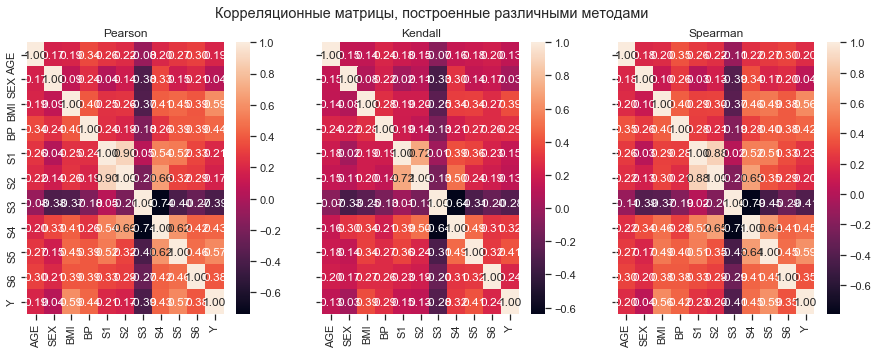

In [77]:
fig, ax = plt.subplots(1, 3, sharex='col', sharey='row', figsize=(15,5))
sns.heatmap(data.corr(method='pearson'), ax=ax[0], annot=True, fmt='.2f')
sns.heatmap(data.corr(method='kendall'), ax=ax[1], annot=True, fmt='.2f')
sns.heatmap(data.corr(method='spearman'), ax=ax[2], annot=True, fmt='.2f')
fig.suptitle('Корреляционные матрицы, построенные различными методами')
ax[0].title.set_text('Pearson')
ax[1].title.set_text('Kendall')
ax[2].title.set_text('Spearman')